In [6]:
import base64
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
pd.options.mode.chained_assignment = None


# IEEE Investment Ranking Challenge Starter Kit

This code contains a starter kit with examples of how to read in the data, perform some basic manipulation, and run a Random Forest model on each time period.

### Read Challenge Data and the Prediction Template
**Note**: This step assumes that you have downloaded the datasets from the [Datasets Page](https://www.crowdai.org/challenges/ieee-investment-ranking-challenge/dataset_files) and download the `Full Dataset` file and saved it inside the `data/` folder as `full_dataset.csv`; and then also download the `Prediction Template` file and saved it inside the `data/` folder as `prediction_template.csv`.

In [7]:
#dataset_file_path = "full_dataset.csv"
#pred_template_file_path = "prediction_template.csv"


# dataset_file_path = "YOUR_DATASET_FILE_PATH_HERE"
# pred_template_file_path = "YOUR_PREDICTION_TEMPLATE_FILE_PATH_HERE"

data = pd.read_csv('full_dataset.csv')
pred_template = pd.read_csv('prediction_template.csv')

In [94]:
time_periods

array(['1996_2', '1997_1', '1997_2', '1998_1', '1998_2', '1999_1',
       '1999_2', '2000_1', '2000_2', '2001_1', '2001_2', '2002_1',
       '2002_2', '2003_1', '2003_2', '2004_1', '2004_2', '2005_1',
       '2005_2', '2006_1', '2006_2', '2007_1', '2007_2', '2008_1',
       '2008_2', '2009_1', '2009_2', '2010_1', '2010_2', '2011_1',
       '2011_2', '2012_1', '2012_2', '2013_1', '2013_2', '2014_1',
       '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1'], dtype=object)

In [8]:
data[(data['time_period']=='2002_2')&(data['Train']==1)]

,time_period,index,Train,Norm_Ret_F6M,Rank_F6M,X1_1,X1_2,X1_3,X1_4,X1_5,...,X69_3,X69_4,X69_5,X69_6,X70_1,X70_2,X70_3,X70_4,X70_5,X70_6
10867,2002_2,2002_2_3owbtdcd,1,0.147794,186.0,-1.504382,0.221889,-0.134979,-0.136034,0.570216,...,0.002180,0.002180,0.002180,0.002180,1.581411,1.655412,0.878400,1.174405,1.322407,1.285407
10868,2002_2,2002_2_urkje6lv,1,-0.585590,428.0,-1.354801,-0.301576,-0.660033,-0.792468,0.939438,...,0.002179,0.002179,0.002179,0.002179,-1.082630,-1.267632,-1.230632,-1.267632,-1.304633,-1.267632
10869,2002_2,2002_2_fwrp5458,1,-0.311203,330.0,-0.425064,0.310591,-1.385483,-0.068258,0.097163,...,0.002180,0.002180,0.002180,0.002180,1.063403,0.582396,0.434394,0.767399,0.804399,0.693398
10870,2002_2,2002_2_66je4qaw,1,-0.342390,347.0,-1.546747,1.549012,-1.371821,0.566386,0.476806,...,0.002180,0.002179,0.002179,0.002179,0.952402,0.915401,0.508395,0.804399,0.656397,0.619396
10871,2002_2,2002_2_thq17jzx,1,-0.251151,306.0,-0.411972,-0.715761,-1.657942,-1.112071,1.504918,...,0.002173,0.002173,0.002174,0.002174,1.618412,1.544411,1.729413,1.692413,1.766414,1.692413
10872,2002_2,2002_2_adwbdwm1,1,-1.099636,532.0,-0.499915,-1.799703,0.383756,1.024196,0.118351,...,0.002180,0.002180,0.002180,0.002180,-1.452635,-1.526636,-1.415635,-1.489636,-1.452635,-1.415635
10873,2002_2,2002_2_dp6sgj2m,1,0.135934,190.0,-0.988450,0.602192,-0.853654,0.856170,-0.045854,...,0.002180,0.002180,0.002180,0.002180,-0.971628,-1.156631,-1.304633,-0.416619,-0.564622,-0.268617
10874,2002_2,2002_2_53so3k7f,1,-0.657675,454.0,-0.408939,0.230389,-0.243498,1.036322,0.487558,...,NaN,NaN,NaN,NaN,-0.083614,-0.453620,-0.564622,-0.527621,-0.564622,-0.527621
10875,2002_2,2002_2_j4xo8jpu,1,-0.563708,424.0,-2.348112,0.119017,0.088530,0.795332,1.357098,...,0.002179,0.002179,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,-0.083614
10876,2002_2,2002_2_400epmfi,1,-0.816746,486.0,0.350935,0.858495,-0.709254,1.200381,-0.428395,...,0.002180,0.002180,0.002180,0.002180,-1.600637,-1.748640,-1.748640,-1.748640,-1.748640,-1.637638


### Sample EDA

## Example Feature Engineering

Each unique variable is broken up into **6 non-overlapping observations** in each time period
For example `X1` has six monthly observations in each period represented as `X1_1`, `X1_2`,...,`X1_6`

To make it easier to model, this code will average the values within each `time_period`

In [9]:
#create list to iterate over
variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
for var in variable_list:
    data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)

# create a new feature that is the percentile of each variable average rather than the raw value
# this is a common way to model the data as you are predicting stock performance relative to peers 
# using attributes that are also relative to peers
#for var in variable_list:
#    data[var + 'avg' + '_pctile'] = stat.rankdata(data[var + 'avg'])/data[var + 'avg'].shape[0]    

In [10]:
data['year'] = data['time_period'].apply(lambda x:int(x[0:4]))

data['quarter'] = data['time_period'].apply(lambda x:int(x[5:6]))

In [60]:
data

,time_period,index,Train,Norm_Ret_F6M,Rank_F6M,X1_1,X1_2,X1_3,X1_4,X1_5,...,X69_5,X69_6,X70_1,X70_2,X70_3,X70_4,X70_5,X70_6,year,quarter
0,1996_2,1996_2_lo2py80q,1,-0.164343,563.0,-0.581405,0.324594,0.606611,0.508565,0.304816,...,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
1,1996_2,1996_2_c0lbkx5l,1,0.159314,402.0,0.355752,0.483632,0.885929,-0.091519,2.189224,...,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
2,1996_2,1996_2_awxeoifz,1,0.931337,131.0,-1.232963,0.032044,0.212912,-1.001768,0.849036,...,0.002179,0.002179,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
3,1996_2,1996_2_4s31wr2v,1,0.520933,254.0,-2.807413,1.122146,0.145536,-1.160902,1.201142,...,0.002179,0.002179,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
4,1996_2,1996_2_d70vvuvm,1,-0.750410,772.0,-1.009417,0.748711,0.050893,-0.017163,0.202561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
5,1996_2,1996_2_byzx1h6v,1,-1.189989,850.0,-0.163333,-0.128210,-0.373264,0.020016,0.737892,...,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
6,1996_2,1996_2_3d3vp8iw,1,-1.438607,871.0,-0.611016,-0.183611,0.720858,-0.565495,1.114894,...,0.002179,0.002179,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
7,1996_2,1996_2_u7jjj876,1,3.136146,4.0,-0.046826,0.304400,0.680120,0.694903,1.049064,...,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
8,1996_2,1996_2_3budlxjq,1,-0.343191,638.0,-1.206223,2.389159,-0.279630,0.559982,-0.091519,...,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,NaN,1996,2
9,1996_2,1996_2_rsvlvf9y,1,0.231265,363.0,0.012642,0.222713,-0.265473,0.186871,0.707066,...,0.002180,0.002180,NaN,NaN,NaN,NaN,NaN,NaN,1996,2


### Subset features to use for modeling. 
Subsetting `time_period`, `index`, `Train`, `Norm_Ret_F6M`, `Rank_F6M`, and the avg and percentile variables we created using  a regex filter for 'avg' to get both the avg and percentile columns only.

In [11]:
model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)

model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))

In [61]:
model_data=data

In [22]:
model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))

In [12]:
#model_data['avg_quarter']=avg_return
model_data

,time_period,index,Train,Norm_Ret_F6M,Rank_F6M,X1_avg,X2_avg,X3_avg,X4_avg,X5_avg,...,X63_avg,X64_avg,X65_avg,X66_avg,X67_avg,X68_avg,X69_avg,X70_avg,year,quarter
0,1996_2,1996_2_lo2py80q,1,-0.164343,563.0,0.103141,0.266471,0.090441,-0.001460,0.004838,...,-0.543723,0.045641,-0.237641,-0.393841,0.222733,-0.004981,0.002180,NaN,1996,2
1,1996_2,1996_2_c0lbkx5l,1,0.159314,402.0,0.595348,0.794574,0.512223,0.264419,0.249596,...,-0.461571,0.312671,-0.359308,-0.686705,-0.166179,-0.005312,0.002179,NaN,1996,2
2,1996_2,1996_2_awxeoifz,1,0.931337,131.0,-0.130188,-0.532513,-0.980416,-0.649966,-0.584488,...,-0.380619,-0.620955,-0.500304,-0.125145,0.876411,-0.005404,0.002178,NaN,1996,2
3,1996_2,1996_2_4s31wr2v,1,0.520933,254.0,-0.171538,-0.607686,-1.247847,-0.776422,-0.495723,...,-0.282470,-0.470143,-0.515858,-0.508529,0.984860,-0.005187,0.002178,NaN,1996,2
4,1996_2,1996_2_d70vvuvm,1,-0.750410,772.0,-0.064863,-0.175671,-0.145160,-0.111024,-0.370753,...,1.022226,0.223307,-0.398994,-0.844874,0.139202,-0.005607,0.002148,NaN,1996,2
5,1996_2,1996_2_byzx1h6v,1,-1.189989,850.0,0.066563,0.030994,-0.373693,-0.327742,-0.213651,...,-1.032976,0.461374,-0.593459,-0.650759,0.638687,-0.005685,0.002180,NaN,1996,2
6,1996_2,1996_2_3d3vp8iw,1,-1.438607,871.0,0.060603,-0.283660,-0.333255,-0.062471,-0.032473,...,-0.047741,0.487113,0.449623,-0.243610,-0.275772,-0.005559,0.002179,NaN,1996,2
7,1996_2,1996_2_u7jjj876,1,3.136146,4.0,0.369325,0.554275,0.432570,0.109273,0.059706,...,-1.127632,-0.184814,-0.369969,-0.492762,-0.065955,-0.003866,0.002179,NaN,1996,2
8,1996_2,1996_2_3budlxjq,1,-0.343191,638.0,0.223672,0.131359,0.189850,0.334353,0.357721,...,-0.321212,-0.136711,-0.466107,-0.610306,0.505759,-0.005498,0.002180,NaN,1996,2
9,1996_2,1996_2_rsvlvf9y,1,0.231265,363.0,0.181704,0.219020,0.152527,0.156923,0.271545,...,-1.153816,0.415996,-0.426016,-0.505381,0.379249,-0.005663,0.002180,NaN,1996,2


### Create function for imputation and Random Forest

In [132]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import Adam, Adadelta
from sklearn import preprocessing
import pandas

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [13]:
import numpy as np
#from keras.models import Sequential
#from keras.layers import Dense,Dropout
time_periods = np.unique(model_data['time_period'],return_index=True)[0]
time_periods_index = np.unique(model_data['time_period'],return_index=True)[1]
#np.random.seed(2000)
def light_gbm(train_start_period,prediction_period):
    data = pd.read_csv('full_dataset.csv')
    variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
    for var in variable_list:
        data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)
    model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)

    model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

    model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))
    train_window_start = time_periods_index[time_periods == train_start_period][0]
    train_window_end = time_periods_index[time_periods == prediction_period][0]
    
    rf_model_data = model_data.iloc[range(train_window_start,train_window_end),:]
    
    rf_model_data.fillna(0,inplace = True)
    d_train = lgb.Dataset(rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'quarter'], label = rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
    params = {'task': 'train',
    'boosting_type': 'gbdt',
    'application': 'regression',
    'metric': 'l2_root',
    'learning_rate': 0.1, 
    'max_depth': 20, 
    'num_leaves': 500}
    model = lgb.train(params, d_train, num_boost_round=200,valid_sets=[d_train])
    #    rf = RandomForestRegressor(n_estimators=500,verbose = 2,oob_score=True,max_features=10,max_depth=15)
    #rf = CatBoostRegressor(depth=8, iterations=100,rsm=1.0, learning_rate=0.1,eval_metric='Accuracy',random_seed=1,thread_count=4,verbose=True)
    # fit using training data only (Train == 1)
##    f=rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'quarter']
#    x = f.values #returns a numpy array
#    min_max_scaler = preprocessing.MinMaxScaler()
#    x_scaled = min_max_scaler.fit_transform(x)
#    df = pandas.DataFrame(x_scaled)
 #   model = Sequential()
#   model.add(Dense(256, input_dim=f.shape[1], activation='sigmoid'))
#    model.add(Dropout(0.1))
#    model.add(Dense(128, activation='sigmoid'))
#    model.add(Dropout(0.1))
#    model.add(Dense(64, activation='sigmoid'))
#    model.add(Dropout(0.1))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dense(10,  activation='sigmoid'))
#    model.add(Dense(1, activation='linear'))
#    model.compile(loss='mean_squared_error',optimizer='Adam', metrics=['accuracy'])
    #gbm.fit(rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'X70_avg_pctile'],rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
#    rf.fit(rf_model_data.loc[, rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
#    model.fit(f.as_matrix(),rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'].as_matrix(),verbose=2,
#              batch_size=10,epochs=10)
                
              
    return(model)

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
time_periods = np.unique(model_data['time_period'],return_index=True)[0]
time_periods_index = np.unique(model_data['time_period'],return_index=True)[1]
np.random.seed(2000)
def light_gbm1(train_start_period,prediction_period):
    data = pd.read_csv('full_dataset.csv')
    variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
    for var in variable_list:
        data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)
    for var in variable_list:
        data[var + 'avg' + '_pctile'] = stat.rankdata(data[var + 'avg'])/data[var + 'avg'].shape[0]    
    model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)

    model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

    model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))

    train_window_start = time_periods_index[time_periods == train_start_period][0]
    train_window_end = time_periods_index[time_periods == prediction_period][0]
    
    rf_model_data = model_data.iloc[range(train_window_start,train_window_end),:]
    
    rf_model_data.fillna(0,inplace = True)
    d_train = lgb.Dataset(rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg_pctile':'quarter'], label = rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
    params = {'task': 'train',
    'boosting_type': 'gbdt',
    'application': 'regression',
    'metric': 'l2_root',
    'learning_rate': 0.1, 
    'max_depth': 20, 
    'num_leaves': 500}
    model = lgb.train(params, d_train, num_boost_round=200,valid_sets=[d_train])
    #    rf = RandomForestRegressor(n_estimators=500,verbose = 2,oob_score=True,max_features=10,max_depth=15)
    #rf = CatBoostRegressor(depth=8, iterations=100,rsm=1.0, learning_rate=0.1,eval_metric='Accuracy',random_seed=1,thread_count=4,verbose=True)
    # fit using training data only (Train == 1)
##    f=rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'quarter']
#    x = f.values #returns a numpy array
#    min_max_scaler = preprocessing.MinMaxScaler()
#    x_scaled = min_max_scaler.fit_transform(x)
#    df = pandas.DataFrame(x_scaled)
 #   model = Sequential()
#   model.add(Dense(256, input_dim=f.shape[1], activation='sigmoid'))
#    model.add(Dropout(0.1))
#    model.add(Dense(128, activation='sigmoid'))
#    model.add(Dropout(0.1))
#    model.add(Dense(64, activation='sigmoid'))
#    model.add(Dropout(0.1))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dense(10,  activation='sigmoid'))
#    model.add(Dense(1, activation='linear'))
#    model.compile(loss='mean_squared_error',optimizer='Adam', metrics=['accuracy'])
    #gbm.fit(rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'X70_avg_pctile'],rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
#    rf.fit(rf_model_data.loc[, rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
#    model.fit(f.as_matrix(),rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'].as_matrix(),verbose=2,
#              batch_size=10,epochs=10)
                
              
    return(model)

In [19]:
time_periods = np.unique(model_data['time_period'],return_index=True)[0]
time_periods_index = np.unique(model_data['time_period'],return_index=True)[1]

def randomForest(train_start_period,prediction_period):
    data = pd.read_csv('full_dataset.csv')
    variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
    for var in variable_list:
        data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)
    for var in variable_list:
        data[var + 'avg' + '_pctile'] = stat.rankdata(data[var + 'avg'])/data[var + 'avg'].shape[0]    
    model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)


    train_window_start = time_periods_index[time_periods == train_start_period][0]
    train_window_end = time_periods_index[time_periods == prediction_period][0]
    
    rf_model_data = model_data.iloc[range(train_window_start,train_window_end),:]
    
    rf_model_data.fillna(0,inplace = True)
    
    rf = RandomForestRegressor(n_estimators=500,verbose = 2,oob_score=True, max_features = 10,max_depth=15)
    
    # fit using training data only (Train == 1)
    rf.fit(rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'X70_avg_pctile'], rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
    
    return(rf)

In [20]:
time_periods = np.unique(model_data['time_period'],return_index=True)[0]
time_periods_index = np.unique(model_data['time_period'],return_index=True)[1]

def catboost(train_start_period,prediction_period):
    data = pd.read_csv('full_dataset.csv')
    variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
    for var in variable_list:
        data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)
    for var in variable_list:
        data[var + 'avg' + '_pctile'] = stat.rankdata(data[var + 'avg'])/data[var + 'avg'].shape[0]    
    model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)

    model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

    model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))


    train_window_start = time_periods_index[time_periods == train_start_period][0]
    train_window_end = time_periods_index[time_periods == prediction_period][0]
    
    rf_model_data = model_data.iloc[range(train_window_start,train_window_end),:]
    
    rf_model_data.fillna(0,inplace = True)
    
    rf = CatBoostRegressor(depth=8, iterations=200,rsm=1.0, learning_rate=0.1,random_seed=1,thread_count=4,verbose=True)
    
    # fit using training data only (Train == 1)
    rf.fit(rf_model_data.loc[rf_model_data['Train'] == 1,'X1_avg':'quarter'], rf_model_data.loc[rf_model_data['Train'] == 1,'Norm_Ret_F6M'])
    
    return(rf)

In [ ]:
import xgboost as xgb

def xgRegression(train_start_period,prediction_period):
    data = pd.read_csv('full_dataset.csv')
    variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
    for var in variable_list:
        data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)
    model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)

    model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

    model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))
    train_window_start = time_periods_index[time_periods == train_start_period][0]
    train_window_end = time_periods_index[time_periods == prediction_period][0]
    
    xg_model_data = model_data.iloc[range(train_window_start,train_window_end),:]
#    xg_model_data.fillna(0,inplace = True)
    
    dtrain = xgb.DMatrix(data=xg_model_data.loc[xg_model_data['Train'] == 1,'X1_avg':'quarter'], label=xg_model_data.loc[xg_model_data['Train'] == 1,'Norm_Ret_F6M'])
    params ={'eta':0.1,'seed':0,'subsample':1.0,'colsample_bytree':1.0,'objective':'reg:linear','max_depth':6,'min_child_weight':1}
    watchlist = [(dtrain, 'train')]
    r1 = xgb.train(params, dtrain, 500,watchlist,verbose_eval=20)
    
    return(r1)

In [ ]:
import xgboost as xgb

def xgRegression1(train_start_period,prediction_period):
    data = pd.read_csv('full_dataset.csv')
    variable_list = ["X" + str(i) + '_' for i in range(1,71)]
        
    for var in variable_list:
        data[var + 'avg'] = data.filter(regex=(var)).mean(axis = 1)
    for var in variable_list:
        data[var + 'avg' + '_pctile'] = stat.rankdata(data[var + 'avg'])/data[var + 'avg'].shape[0]    
    model_data = pd.concat([data.iloc[:,0:5],data.filter(regex = ('avg'))],axis=1)

    model_data['year'] = model_data['time_period'].apply(lambda x:int(x[0:4]))

    model_data['quarter'] = model_data['time_period'].apply(lambda x:int(x[5:6]))

    train_window_start = time_periods_index[time_periods == train_start_period][0]
    train_window_end = time_periods_index[time_periods == prediction_period][0]
    
    xg_model_data = model_data.iloc[range(train_window_start,train_window_end),:]
#    xg_model_data.fillna(0,inplace = True)
    
    dtrain = xgb.DMatrix(data=xg_model_data.loc[xg_model_data['Train'] == 1,'X1_avg_pctile':'quarter'], label=xg_model_data.loc[xg_model_data['Train'] == 1,'Norm_Ret_F6M'])
    params ={'eta':0.1,'seed':0,'subsample':1.0,'colsample_bytree':1.0,'objective':'reg:linear','max_depth':6,'min_child_weight':1}
    watchlist = [(dtrain, 'train')]
    r1 = xgb.train(params, dtrain, 500,watchlist,verbose_eval=20)
    
    return(r1)

### Create function for calculating spearman correlation and Normalized Discounted Cumulative Gain
**Note** : This function was incorrectly calculating NDCG as of the challenge launch. This was fixed 03/28. For details and questions, join the discussion [here.](https://www.crowdai.org/topics/notice-error-in-ndcg-calculation-in-evaluation-script/discussion)

In [14]:
def calc_metrics(time_period, predicted_rank):
    
    #subset actual values for prediction time_period
    actuals = model_data.loc[(model_data['time_period'] == time_period) & (model_data['Train'] == 1),:]
    
    #join predictions onto actuals
    actuals['Rank_F6M_pred'] = predicted_rank
    
    #calculate spearman correlation
    spearman = stat.spearmanr(actuals['Rank_F6M'],actuals['Rank_F6M_pred'])[0]
    
    # calculate NDCG = DCG of Top 20% / Ideal DCG of Top 20%
    # subset top 20% predictions
    t20 = actuals.loc[actuals['Rank_F6M_pred'] <= np.nanpercentile(actuals['Rank_F6M_pred'],20),:]
    t20['discount'] = np.amax(actuals['Rank_F6M_pred'])/(np.amax(actuals['Rank_F6M_pred'])+actuals['Rank_F6M_pred'])
    t20['gain'] = t20['Norm_Ret_F6M']*t20['discount']
    DCG = np.sum(t20['gain'])
    
    #subset top 20% actuals
    i20 = actuals.loc[actuals['Rank_F6M'] <= np.nanpercentile(actuals['Rank_F6M'],20),:]
    i20['discount'] = np.amax(actuals['Rank_F6M'])/(np.amax(actuals['Rank_F6M'])+actuals['Rank_F6M'])
    i20['gain'] = i20['Norm_Ret_F6M']*i20['discount']
    IDCG = np.sum(i20['gain'])
    
    NDCG = DCG/IDCG
    
    # return time_period, spearman correlation, NDCG
    return(pd.DataFrame([(time_period,spearman,NDCG)],columns = ['time_period','spearman','NDCG']))

### Random forest model on warm-up period

In [30]:
time = '2016_2'

rf = catboost(train_start_period = '1996_2', prediction_period = time)

Borders for float features generated
0:	learn 0.9889156824	total: 359ms	remaining: 35.5s
1:	learn 0.9814131772	total: 702ms	remaining: 34.4s
2:	learn 0.9734695786	total: 1.02s	remaining: 33s
3:	learn 0.966020568	total: 1.45s	remaining: 34.9s
4:	learn 0.9620315133	total: 1.83s	remaining: 34.7s
5:	learn 0.9579251884	total: 2.17s	remaining: 34s
6:	learn 0.9526908234	total: 2.61s	remaining: 34.7s
7:	learn 0.9480028286	total: 2.94s	remaining: 33.8s
8:	learn 0.9449905188	total: 3.26s	remaining: 33s
9:	learn 0.9414096771	total: 3.69s	remaining: 33.3s
10:	learn 0.9391856184	total: 4.04s	remaining: 32.6s
11:	learn 0.9364590799	total: 4.37s	remaining: 32s
12:	learn 0.9333991975	total: 4.8s	remaining: 32.1s
13:	learn 0.9313669524	total: 5.13s	remaining: 31.5s
14:	learn 0.9287169708	total: 5.47s	remaining: 31s
15:	learn 0.9262023725	total: 5.89s	remaining: 30.9s
16:	learn 0.924298548	total: 6.23s	remaining: 30.4s
17:	learn 0.9224592012	total: 6.6s	remaining: 30.1s
18:	learn 0.9202909059	total: 7.0

In [31]:
rf.feature_importances_

[1.1814553002334223,
 1.381983272778019,
 0.2836050935344887,
 0.583944090254067,
 0.13810307918204523,
 0.35450825327471913,
 0.45306628193079257,
 0.4047281225386785,
 0.7727584686224107,
 0.7931827664366873,
 0.868100535253829,
 1.4623794615141714,
 2.1779554577156452,
 0.8342965566471072,
 0.02228000101134907,
 0.6563166197706913,
 0.8277767957225316,
 0.7138764905096366,
 1.367632289262255,
 0.45040589244011847,
 0.3898577106290419,
 0.4269410457559378,
 0.4361196090765894,
 0.11442189995522435,
 0.6358317790158632,
 0.44823722159673846,
 0.9052213969284171,
 0.132124217954433,
 0.2798572681907031,
 1.1555596558992651,
 1.0922846109775088,
 0.0,
 0.54107473190641,
 0.0852066965235688,
 0.1424794642505955,
 0.2006996499946992,
 0.4868628318293105,
 0.4902519772408861,
 2.3379751495342527,
 0.19476545153469485,
 0.04200776579520859,
 0.8217453449575418,
 0.6418910416727862,
 0.8874547256319327,
 0.9065247155203934,
 0.4481123506472654,
 0.5965268244442659,
 1.5109095072894014,
 0.36

## Expanding window procedure
Expanding window = Train model up to time `t` to predict on all observations at time `t+1`   
* Show results on training data    
* Add test predictions to prediction template

In [51]:
time_periods

array(['1996_2', '1997_1', '1997_2', '1998_1', '1998_2', '1999_1',
       '1999_2', '2000_1', '2000_2', '2001_1', '2001_2', '2002_1',
       '2002_2', '2003_1', '2003_2', '2004_1', '2004_2', '2005_1',
       '2005_2', '2006_1', '2006_2', '2007_1', '2007_2', '2008_1',
       '2008_2', '2009_1', '2009_2', '2010_1', '2010_2', '2011_1',
       '2011_2', '2012_1', '2012_2', '2013_1', '2013_2', '2014_1',
       '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1'], dtype=object)

In [17]:
time='2017_1' 
rf = light_gbm(train_start_period = '1996_2', prediction_period=time)
if(time != '2017_1'):
    train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg':'quarter'])
    train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1

    train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))

test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg':'quarter'])
test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions


[1]	training's rmse: 0.974008
[2]	training's rmse: 0.950617
[3]	training's rmse: 0.927364
[4]	training's rmse: 0.906065
[5]	training's rmse: 0.887122
[6]	training's rmse: 0.868015
[7]	training's rmse: 0.848673
[8]	training's rmse: 0.832644
[9]	training's rmse: 0.814504
[10]	training's rmse: 0.797841
[11]	training's rmse: 0.781136
[12]	training's rmse: 0.765019
[13]	training's rmse: 0.750788
[14]	training's rmse: 0.738673
[15]	training's rmse: 0.72465
[16]	training's rmse: 0.717318
[17]	training's rmse: 0.707758
[18]	training's rmse: 0.699188
[19]	training's rmse: 0.69379
[20]	training's rmse: 0.682587
[21]	training's rmse: 0.671266
[22]	training's rmse: 0.66026
[23]	training's rmse: 0.648418
[24]	training's rmse: 0.635963
[25]	training's rmse: 0.629656
[26]	training's rmse: 0.617899
[27]	training's rmse: 0.607557
[28]	training's rmse: 0.602122
[29]	training's rmse: 0.590835
[30]	training's rmse: 0.584313
[31]	training's rmse: 0.581764
[32]	training's rmse: 0.577265
[33]	training's rmse

In [16]:
rf_list=['2003_1','2004_1','2011_2','2012_1','2013_1','2015_2','2016_1']
lgb_list=['2002_1','2005_1','2007_1','2009_1','2011_1','2017_1']
lgb1_list=['2005_2','2007_2','2010_1','2010_2','2014_2']
xgb_list=['2002_2']
xgb1_list=['2008_2','2012_2','2015_1']
cat_list=['2003_2','2004_2','2006_1','2006_2','2008_1','2009_2','2013_2','2014_1','2016_2']
model_data.fillna(0,inplace = True)
train_results = pd.DataFrame(columns=['time_period','spearman','NDCG'])

for time in time_periods[11:]:
    if time in rf_list:
        rf = randomForest(train_start_period = '1996_2', prediction_period = '2002_1')
        if(time != '2017_1'):
            train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg':'X70_avg_pctile'])
            train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1
    
            train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))
        
        test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg':'X70_avg_pctile'])
        test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
        pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions
    
        
    elif time in lgb_list:
    
        rf = light_gbm(train_start_period = '1996_2', prediction_period=time)
        if(time != '2017_1'):
            train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg':'quarter'])
            train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1
    
            train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))
        
        test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg':'quarter'])
        test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
        pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions
    
        
    elif time in lgb1_list:
        rf =light_gbm1(train_start_period = '1996_2', prediction_period = time)
        if(time != '2017_1'):
            train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg_pctile':'quarter'])
            train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1
    
            train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))
        
        test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg_pctile':'quarter'])
        test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
        pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions
    
        
    elif time in xgb_list:
    
        rf = xgRegression(train_start_period = '1996_2', prediction_period=time)
        if(time != '2017_1'):
            train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg':'quarter'])
            train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1
    
            train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))
        
        test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg':'quarter'])
        test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
        pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions
    
    elif time in xgb1_list:
        rf = xgRegression1(train_start_period = '1996_2', prediction_period = time)
        if(time != '2017_1'):
            train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg_pctile':'quarter'])
            train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1
    
            train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))
        
        test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg_pctile':'quarter'])
        test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
        pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions
    
    elif time in cat_list:
    
        rf = catboost(train_start_period = '1996_2', prediction_period='2002_1')
        if(time != '2017_1'):
            train_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg':'quarter'])
            train_rank_predictions = len(train_predictions) - stat.rankdata(train_predictions,method='ordinal').astype(int) + 1
    
            train_results = train_results.append(calc_metrics(time_period = time, predicted_rank = train_rank_predictions))
        
        test_predictions = rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 0),'X1_avg':'quarter'])
        test_rank_predictions = len(test_predictions) - stat.rankdata(test_predictions,method='ordinal').astype(int) + 1
        pred_template.loc[pred_template['time_period'] == time,'Rank_F6M'] = test_rank_predictions
    
#        if time in rf_list:
#            train_predictions = -1*rf.predict(model_data.loc[(model_data['time_period'] == time) & (model_data['Train'] == 1),'X1_avg':'quarter'])
#    else:
    
    print("Time period " + time + " completed.")

print(train_results)

KeyboardInterrupt: 

In [23]:
pred_template

,time_period,index,Rank_F6M
0,2002_1,2002_1_w4u2nu2c,1
1,2002_1,2002_1_rhsrmfwd,1
2,2002_1,2002_1_35pkv5ta,1
3,2002_1,2002_1_0h249cd2,1
4,2002_1,2002_1_dj5a9myf,1
5,2002_1,2002_1_sics4eoi,1
6,2002_1,2002_1_r09kym3q,1
7,2002_1,2002_1_puj68tx7,1
8,2002_1,2002_1_anzf1pqr,1
9,2002_1,2002_1_ctq9bf3n,1


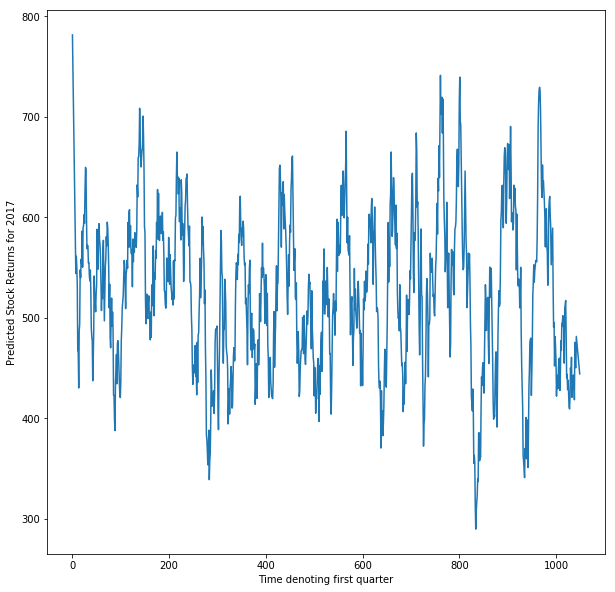

In [39]:
from scipy.signal import savgol_filter

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.ylabel('Predicted Stock Returns for 2017',fontsize=10)
plt.xlabel('Time denoting first quarter',fontsize=10)
plt.plot(savgol_filter((np.array(pred_template[pred_template['time_period']=='2017_1']['Rank_F6M'])),15,1))

### Write csv of test set predictions

In [23]:
pred_template.to_csv('final_sub.csv')

In [24]:
pred_template

,time_period,index,Rank_F6M
0,2002_1,2002_1_w4u2nu2c,143
1,2002_1,2002_1_rhsrmfwd,54
2,2002_1,2002_1_35pkv5ta,40
3,2002_1,2002_1_0h249cd2,53
4,2002_1,2002_1_dj5a9myf,180
5,2002_1,2002_1_sics4eoi,99
6,2002_1,2002_1_r09kym3q,353
7,2002_1,2002_1_puj68tx7,345
8,2002_1,2002_1_anzf1pqr,296
9,2002_1,2002_1_ctq9bf3n,342


In [13]:
#a1=pd.read_csv('xgb_lgb_2_models.csv')

In [14]:
#a2=pd.read_csv('rf.csv')

In [15]:
#rf=['2016_1','2015_2','2014_1','2013_1','2012_1','2011_2','2008_1','2003_1','2003_2','2004_1']
#for i in range(12109):
#    if a1['time_period'][i] in rf:
#        a1['Rank_F6M'][i]=a2['Rank_F6M'][i]
#    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
#a1.to_csv('xgb_lgb_rf.csv',index=False)

In [26]:
#a1=pd.read_csv('xgb_lgb_rf_cata_addedlgbmore.csv')

In [27]:
#a2=pd.read_csv('lgb.csv')

In [28]:
#rf=['2016_2','2012_2','2016_1','2011_1','2009_2','2005_2']
#rf=['2002_2','2015_2']
#for i in range(12109):
#    if a1['time_period'][i] in rf:
#        a1['Rank_F6M'][i]=a2['Rank_F6M'][i]
#    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# 

In [28]:
#a1[a1['time_period']=='2010_1']

,Unnamed: 0,time_period,index,Rank_F6M
5877,5877,2010_1,2010_1_813bdqno,259
5878,5878,2010_1,2010_1_vlz9gg11,57
5879,5879,2010_1,2010_1_ruiquycm,337
5880,5880,2010_1,2010_1_2lfcv0h0,168
5881,5881,2010_1,2010_1_r2qzxxq5,44
5882,5882,2010_1,2010_1_lkch7pad,261
5883,5883,2010_1,2010_1_70m9mvhd,262
5884,5884,2010_1,2010_1_vtzvfsev,163
5885,5885,2010_1,2010_1_lspgavsf,2
5886,5886,2010_1,2010_1_e8fiubec,232


In [29]:
#a1.to_csv('xgb_lgb_rf_cata_addedlgbmore.csv',index=False)

In [13]:
#a1=pd.read_csv('xgb_lgb_rf_cata_addedlgb_sub2_new.csv')

In [29]:
#a1['Rank_F6M'][5877:6227]=test_rank_predictions.tolist()

In [30]:
#a1.to_csv('xgb_lgb_rf_cata_addedlgb_sub2_new.csv',index=False)

## Submit to crowdAI

In [4]:
import crowdai
import sys

In [43]:
api_key = "12cf42f7b42d845cde34e92a64d28825"
encoded_api_key = "WU9VUiBDUk9XREFJIEFQSSBLRVkgSEVSRQ=="

if sys.version_info[0] == 3:
    api_key = api_key.encode()
    encoded_api_key = b"WU9VUiBDUk9XREFJIEFQSSBLRVkgSEVSRQ=="

if base64.b64encode(api_key) == encoded_api_key:
    raise Exception("Please include your own API Key from : https://www.crowdai.org/participants/<your-crowdai-username>")

challenge = crowdai.Challenge("IEEEInvestmentRankingChallenge", api_key)
result = challenge.submit("final_sub.csv",round=2)
print(result)


CrowdAI.Event.Authentication : Authenticating for challenge = IEEEInvestmentRankingChallenge
CrowdAI.Event.Connection.CONNECTED
CrowdAI.Event.Authentication.SUCCESS : Authentication Successful
CrowdAI.Event.Misc : Making submission for Round 2
CrowdAI.Event.Misc.FILE_UPLOAD : Preparing for file upload
CrowdAI.Event.Misc.FILE_UPLOAD : Uploading file



  0% |                                                                                              |[00:00<?]  ?% /s] 
  1% |█                                                                                     |[00:02<03:19]   2.02s/% ] 
 19% |████████████████▏                                                                     |[00:03<01:55]   1.42s/% ] 
 23% |███████████████████▍                                                                  |[00:03<01:20]   1.04s/% ] 
 30% |█████████████████████████▉                                                            |[00:04<00:52]   1.34% /s] 
 57% |████████████████████████████████████████████████▋                                     |[00:04<00:22]   1.90% /s] 
 76% |████████████████████████████████████████████████████████████████▉                     |[00:04<00:09]   2.70% /s] 
100% |██████████████████████████████████████████████████████████████████████████████████████|[00:05<00:00]  19.61% /s] 
                                       

CrowdAI.Event.Job.ENQUEUED : 2930c26e-3f20-4bf2-bc36-b03beb289652


  0% |                                                                                           |[24:09:23<?]  ?% /s] 
                                                                                                                       


CrowdAI.Event.Job.RUNNING : 2930c26e-3f20-4bf2-bc36-b03beb289652


  0% |                                                                                           |[24:09:23<?]  ?% /s] 
  0% |                                                                                              |[00:00<?]  ?% /s] 
                                                                                                                       


CrowdAI.Event.Job.INFO : (2930c26e-3f20-4bf2-bc36-b03beb289652) Grading Submission....


  0% |                                                                                           |[24:09:23<?]  ?% /s] 
                                                                                                                       


CrowdAI.Event.Job.INFO : (2930c26e-3f20-4bf2-bc36-b03beb289652) Scores Submitted Successfully ! Please remember to upload your code and a description of your approach (as a short paper) to https://gitlab.crowdai.org , as a private repository, tto be eligible for the final round-2 rankings.


  0% |                                                                                           |[24:09:25<?]  ?% /s] 
2930c26e-3f20-4bf2-bc36-b03beb289652:   0% |                                           |[00:03<?]  ?% /s] 
                                                                                                                       


CrowdAI.Event.Job.COMPLETE : 2930c26e-3f20-4bf2-bc36-b03beb289652	   🍺 


  0% |                                                                                           |[24:09:25<?]  ?% /s] 
2930c26e-3f20-4bf2-bc36-b03beb289652: 100% |███████████████████████████████████|[00:03<00:00]  30.03% /s] 
2930c26e-3f20-4bf2-bc36-b03beb289652: 100% |███████████████████████████████████|[00:03<00:00]  30.03% /s] 


{u'grading_message': u'graded successfully', u'grading_status': u'graded', 'message': u'', u'api_key': u'12cf42f7b42d845cde34e92a64d28825', u'challenge_client_name': u'IEEEInvestmentRankingChallenge'}
